In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [69]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from util.file_util import StockTwitsFileReader, StockDataFileReader
from util.ts_util import resample_weekly
from util.plot_util import plot_time_series_bar
from config import STOCKTWITS_TICKER_LIST

In [4]:
start_date = '2018-01-01'
end_date = '2019-08-10'

twit_file_reader = StockTwitsFileReader() 
stock_file_reader = StockDataFileReader()

In [5]:
sp500_ticker_list = STOCKTWITS_TICKER_LIST

In [6]:
len(sp500_ticker_list)

502

## Distribution of Total Twits by Company

In [28]:
%%time

stats = []

for ticker in sp500_ticker_list:
    twit_df = twit_file_reader.read_daily_sentiment_summary_prelim(ticker)
    n_days = twit_df.shape[0]
    
    twit_sum = twit_df.sum(axis=0)
    total_bearish = twit_sum['Bearish']
    total_bullish = twit_sum['Bullish']
    
    total_twits = total_bearish + total_bullish
    avg_twits = total_twits / n_days
    
    stats.append({
        'ticker': ticker, 
        'total_bearish': total_bearish,
        'total_bullish': total_bullish,
        'total_twits': total_twits,
        'avg_twits': avg_twits,
        'n_days': n_days,
    })

CPU times: user 3.42 s, sys: 116 ms, total: 3.54 s
Wall time: 3.55 s


In [29]:
stat_df = pd.DataFrame(stats).sort_values('avg_twits', ascending=False)

In [30]:
stat_df.head()

,avg_twits,n_days,ticker,total_bearish,total_bullish,total_twits
275,744.302381,420,AMD,59381.0,253226.0,312607.0
400,400.285714,420,AAPL,48634.0,119486.0,168120.0
63,376.578571,420,AMZN,38453.0,119710.0,158163.0
406,306.445238,420,MU,22832.0,105875.0,128707.0
469,299.835714,420,FB,41525.0,84406.0,125931.0


In [14]:
(stat_df['avg_twits'] > 10).sum()

64

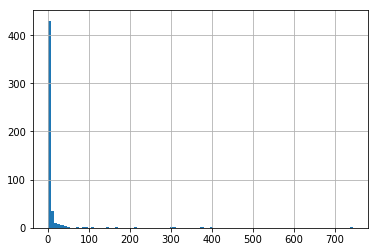

In [31]:
stat_df['avg_twits'].hist(bins=100)

In [41]:
stat_df[['total_bearish', 'total_bullish']].sum()

total_bearish     472116.0
total_bullish    1489482.0
dtype: float64

In [43]:
stat_df['bullish_more_than_bearish'] = stat_df['total_bullish'] > stat_df['total_bearish']

In [45]:
stat_df['bullish_more_than_bearish'].mean()

0.9820717131474104

In [46]:
stat_df[~stat_df['bullish_more_than_bearish']]

,avg_twits,n_days,ticker,total_bearish,total_bullish,total_twits,bullish_more_than_bearish
453,34.004843,413,NKE,7084.0,6960.0,14044.0,False
115,24.952267,419,CMG,5370.0,5085.0,10455.0,False
338,6.981273,267,TIF,985.0,879.0,1864.0,False
299,3.728814,177,HAS,345.0,315.0,660.0,False
178,3.510067,298,DISH,709.0,337.0,1046.0,False
281,3.397351,302,HOG,532.0,494.0,1026.0,False
374,2.587571,177,MAR,232.0,226.0,458.0,False
58,1.775000,80,NI,75.0,67.0,142.0,False
358,1.553398,103,SEE,110.0,50.0,160.0,False


## Distribution of Twits Across Time

In [49]:
sample_twit_df = twit_df
sample_wkly_twit_df = resample_weekly(sample_twit_df)

In [64]:
wkly_sum_df = sample_wkly_twit_df.copy()

In [65]:
wkly_sum_df['Bearish'] = 0.0
wkly_sum_df['Bullish'] = 0.0

In [68]:
%%time

for ticker in sp500_ticker_list:
    twit_df = twit_file_reader.read_daily_sentiment_summary_prelim(ticker)
    wkly_twit_df = resample_weekly(twit_df)
    
    wkly_sum_df = wkly_sum_df.add(wkly_twit_df, fill_value=0)

CPU times: user 6.47 s, sys: 149 ms, total: 6.62 s
Wall time: 6.64 s


/Users/seung-jae_bang/.virtualenvs/my_research/lib/python3.6/site-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


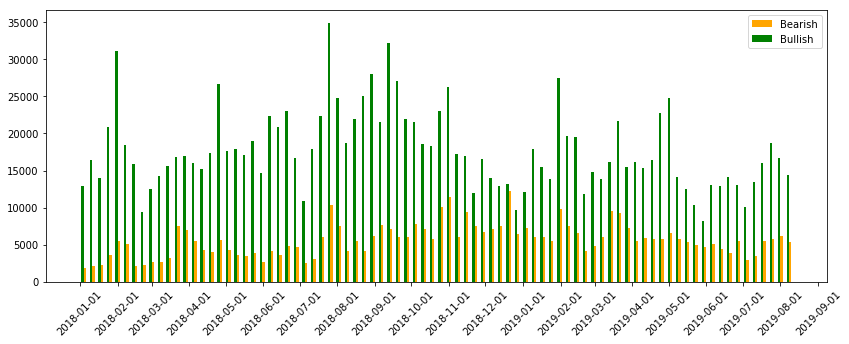

In [72]:
ax = plot_time_series_bar(wkly_sum_df, 
                          figsize=(14, 5),)
